Import Packages

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import skfuzzy

print ("Successfully Import!")

Successfully Import!


Create Base Data

In [4]:
base = pd.read_csv("UCI_Credit_Card.csv", header=0)
base.shape

(30000, 25)

Preview Base Data

In [5]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Calculating BILL_TOTAL

In [8]:
base['BILL_TOTAL'] = sum([base['BILL_AMT1'], base['BILL_AMT2'], base['BILL_AMT3'], base['BILL_AMT4'], base['BILL_AMT5'], base['BILL_AMT6']])
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_TOTAL
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0


Calculating X Value

In [10]:
x = base.iloc[:,[1,25]].values
x

array([[ 20000.,   7704.],
       [120000.,  17077.],
       [ 90000., 101653.],
       ...,
       [ 30000.,  70496.],
       [ 80000., 266611.],
       [ 50000., 230874.]])

In [12]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [13]:
x.shape

(30000, 2)

In [14]:
x.T.shape

(2, 30000)

Calculating R Value

In [16]:
r = skfuzzy.cmeans(data=x.T, c=3, m=2, error=0.005, maxiter=1000, init=None)
r

(array([[-0.73888101, -0.30174661],
        [ 0.74965784,  2.0162732 ],
        [ 0.97539957, -0.42055436]]),
 array([[0.91181851, 0.8486601 , 0.97914709, ..., 0.95010636, 0.95612987,
         0.97291943],
        [0.02592829, 0.02732589, 0.00499024, ..., 0.01492057, 0.01406362,
         0.00906666],
        [0.0622532 , 0.12401401, 0.01586267, ..., 0.03497307, 0.02980651,
         0.01801391]]),
 array([[0.56429217, 0.76565345, 0.13408158, ..., 0.24625316, 0.34157568,
         0.70368436],
        [0.02635802, 0.18159646, 0.43115188, ..., 0.21721213, 0.6370878 ,
         0.17392757],
        [0.40934981, 0.05275009, 0.43476654, ..., 0.53653471, 0.02133652,
         0.12238807]]),
 array([[0.55637621, 0.52128062, 0.20018334, ..., 0.39095702, 0.30021591,
         0.25956396],
        [3.29940637, 2.9050344 , 2.804085  , ..., 3.11976908, 2.47539002,
         2.68880419],
        [2.12932479, 1.36365055, 1.57276457, ..., 2.03773746, 1.70034303,
         1.90756289]]),
 array([25959.371453

Calculating Previsoes

In [19]:
previsoes_porcentagem = r[1]
previsoes_porcentagem.shape

(3, 30000)

In [20]:
previsoes_porcentagem

array([[0.91181851, 0.8486601 , 0.97914709, ..., 0.95010636, 0.95612987,
        0.97291943],
       [0.02592829, 0.02732589, 0.00499024, ..., 0.01492057, 0.01406362,
        0.00906666],
       [0.0622532 , 0.12401401, 0.01586267, ..., 0.03497307, 0.02980651,
        0.01801391]])

In [21]:
previsoes_porcentagem[0][0]

0.9118185085503967

In [24]:
previsoes_porcentagem[1][0]

0.025928290680885317

In [25]:
previsoes_porcentagem[2][0]

0.062253200768717876

In [26]:
sum([previsoes_porcentagem[0][0], previsoes_porcentagem[1][0], previsoes_porcentagem[2][0]])

0.9999999999999999

In [27]:
previsoes = previsoes_porcentagem.argmax(axis=0)
previsoes

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
previsoes[5000]

0

CMeans Result

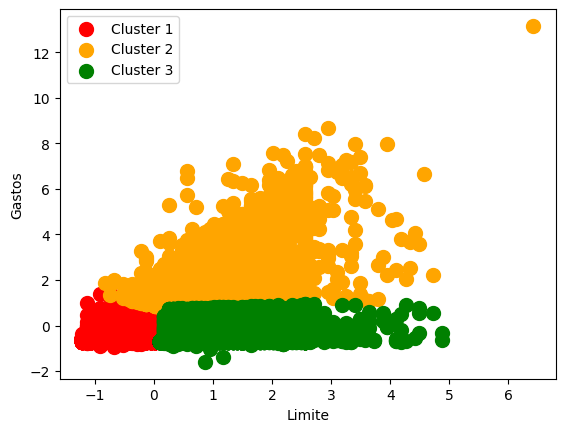

In [30]:
plt.scatter(x[previsoes == 0, 0], x[previsoes == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(x[previsoes == 1, 0], x[previsoes == 1, 1], s=100, c='orange', label='Cluster 2')
plt.scatter(x[previsoes == 2, 0], x[previsoes == 2, 1], s=100, c='green', label='Cluster 3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend()